### Exploratory data analysis and visualization

UIC CS 418, Spring 2023


There are three parts: The first one is a practice introduction to `matplotlib`. The second is a guided exploration of a bikeshare dataset. The third one is a self-guided exploration of a dataset on social media and internet attitudes.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Practice: `matplotlib` (5%)

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

Notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt
	
The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `cos(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

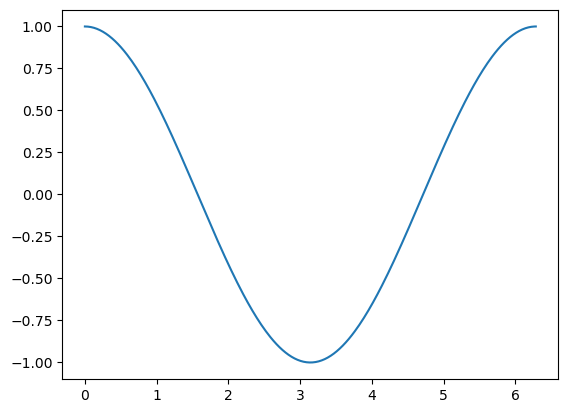

In [3]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.cos(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

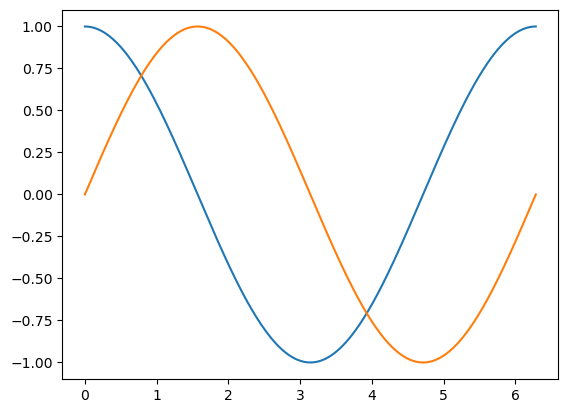

In [4]:
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs))

That plot looks pretty nice but isn't presentation-ready. Luckily, `matplotlib` has a wide array of plot customizations.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q0 (5%):

Skim through the first part of the tutorial at https://github.com/rougier/matplotlib-tutorial to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](q1.png)

Text(0.5, 1.0, 'Graphs of cos(x) and sin(x)')

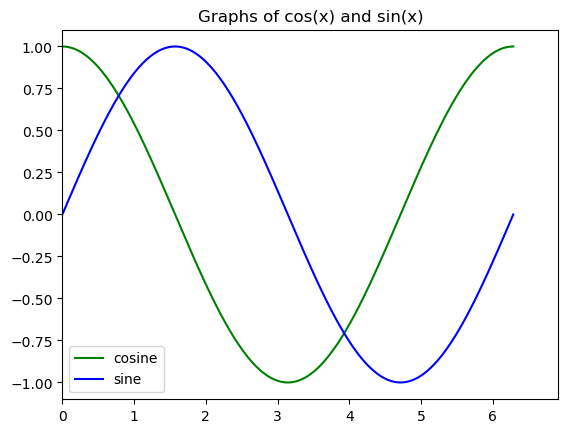

In [21]:
# Here's the starting code from last time. Edit / Add code to create the plot above.
plt.xlim(xs.min()*1.1, xs.max()*1.1)
plt.plot(xs, ys, color = 'green', label='cosine')
plt.plot(xs, np.sin(xs), color = 'blue', label = 'sine')
plt.legend(loc='lower left')
plt.title("Graphs of cos(x) and sin(x)")

# Part 1: Guided EDA of bikeshare trips (40%)

You will be performing some basic EDA (exploratory data analysis) on
bikeshare data in Washington D.C. 

The variables in this data frame are defined as:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week (Sunday to Saturday)
- workingday : if day is neither weekend nor holiday
- weathersit :
    - 1: Clear or partly cloudy
    - 2: Mist + clouds
    - 3: Light Snow or Rain
    - 4: Heavy Rain or Snow
- temp : Normalized temperature in Celsius (divided by 41)
- atemp: Normalized feeling temperature in Celsius (divided by 50)
- hum: Normalized percent humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including casual and registered

In [106]:
bike_trips = pd.read_csv('bikeshare.csv')

# Here we'll do some pandas datetime parsing so that the dteday column
# contains datetime objects.
bike_trips['dteday'] += ':' + bike_trips['hr'].astype(str)
bike_trips['dteday'] = pd.to_datetime(bike_trips['dteday'], format="%Y-%m-%d:%H")
bike_trips = bike_trips.drop(['yr', 'mnth', 'hr'], axis=1)

bike_trips.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.1 (8%):
Explore the `bike_trips` dataframe to answer the following questions.

What is the data granularity?
What time range is represented here? Write code in the cell below to perform your exploration.

In [134]:
granularity = bike_trips['dteday'].diff().min()
print("Granularity: ", granularity)
print("Granularity is Hourly")
min_date = bike_trips['dteday'].min()
max_date = bike_trips['dteday'].max()
print("Time range:", max_date - min_date)
print()
# to check,

Granularity:  0 days 01:00:00
Granularity is Hourly
Time range: 730 days 23:00:00



(_Your Q1.1 answer here. Double click to edit_)

## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `<plotfunc>` is one of the functions listed under _Plotting_ here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

<AxesSubplot: xlabel='dteday'>

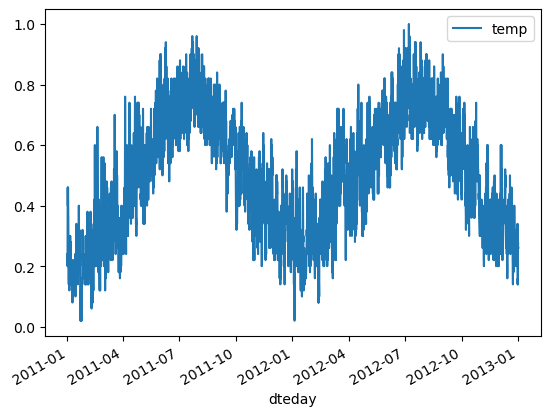

In [28]:
# This plot shows the temperature at each data point

bike_trips.plot.line(x='dteday', y='temp')

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

We can create the same plot as the `dataframe.plot` above using the following `seaborn` function: `sns.lineplot`. Notice that instead of calling the plot function on dataframe object, here we pass it as a parameter to the function:

<AxesSubplot: xlabel='dteday', ylabel='temp'>

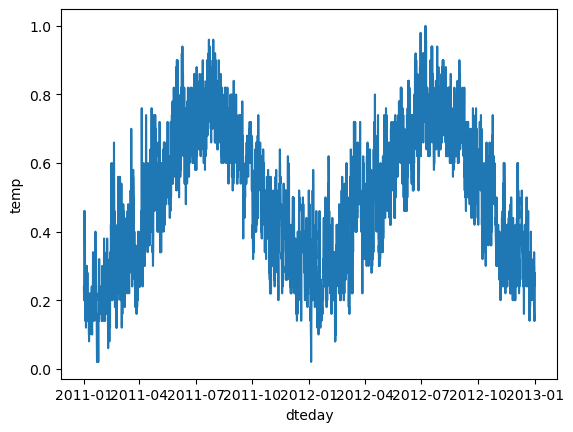

In [29]:
sns.lineplot(x="dteday", y="temp", data=bike_trips)

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

Use seaborn's `barplot` function to make a bar chart showing the average
number of registered riders on each day of the week over the 
entire `bike_trips` dataset.

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html

See if you can figure it out by reading the docs. 

What trends do you notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping to make those.

Text(0.5, 1.0, 'Average Number of Registered Riders by Day of the Week')

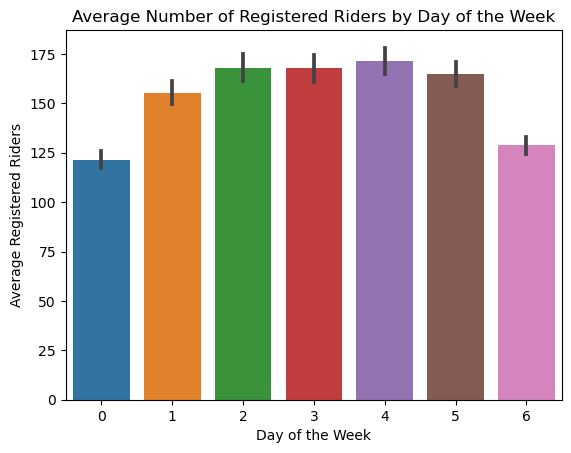

In [30]:
sns.barplot(x='weekday', y='registered', data=bike_trips)
plt.xlabel('Day of the Week')
plt.ylabel('Average Registered Riders')
plt.title('Average Number of Registered Riders by Day of the Week')

The bar graph demonstrates that there are more registered riders on average during the weekdays (Monday through Friday) than there are on weekends (Saturday and Sunday). This pattern shows that throughout the week, possibly for commuting to work or school, bicycles are used more for transportation than on the weekends, when they are utilized more for leisure pursuits.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

Now for a fancier plot that `seaborn` makes really easy to produce.

Use the `displot` function to plot a histogram of all the total rider counts in the `bike_trips` dataset. Can you fit a curve to the histogram of the data using `seaborn`? You just need to tune `kde` and `stat` paramaters to the `displot` function. Fancy!

Text(0.5, 1.0, 'Histogram of Total Rider Counts')

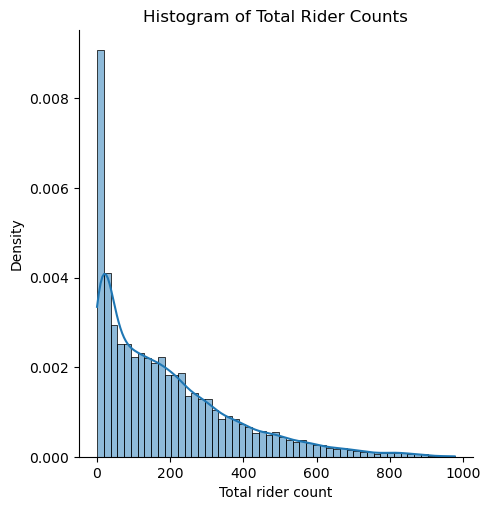

In [31]:
sns.displot(data=bike_trips, x="cnt", kde=True, stat="density")
plt.xlabel('Total rider count')
plt.ylabel('Density')
plt.title('Histogram of Total Rider Counts')

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

Use `seaborn` to make side-by-side boxplots of the number of casual riders (just
checked out a bike for that day) and registered riders (have a bikeshare membership). The `boxplot` function will plot all the columns of the dataframe you pass in.

Once you make the plot, you'll notice that there are many outliers that make the plot hard to see. To mitigate this, change the y-scale to be logarithmic.

That's a plot customization so you'll use `matplotlib`. The `boxplot` function returns a `matplotlib` Axes object which represents a single plot and has a `set_yscale` function.

The result (after customization) should look like:

![](q5.png)

Revisiting Q1.1 on data granularity, what is more suitable text for `ylabel` than `Number of riders`?

Text(0.5, 1.0, 'Boxplot of Registered and Casual Riders')

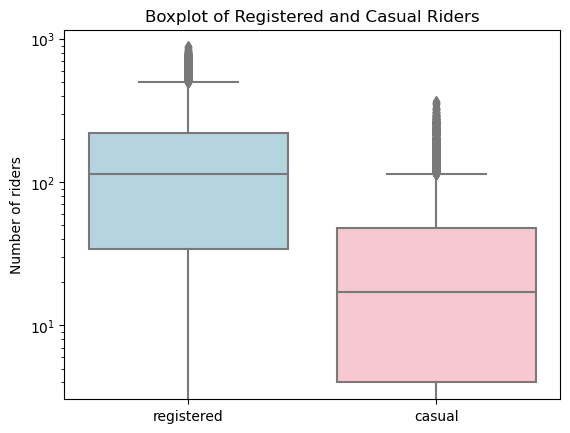

In [37]:
q14 = sns.boxplot(data=bike_trips[['registered', 'casual']], 
                 palette=["lightblue", "pink"])
q14.set_yscale('log')
plt.ylabel('Number of riders')
plt.title('Boxplot of Registered and Casual Riders')

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

Let's take a closer look at the number of registered vs. casual riders.

Use the `lmplot` function to make a scatterplot. Put the number of casual
riders on the x-axis and the number of registered riders on the y-axis.
Each point should correspond to a single row in your `bike_trips` dataframe. Notice that `seaborn` automatically fits a line of best
fit to the plot. Does that line seem to be relevant?

You should note that `lmplot` allows you to pass in `fit_line=False` to
avoid plotting lines of best fit when you feel they are unnecessary 
or misleading.

There seem to be two main groups in the scatterplot. Let's
see if we can separate them out. Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like:

![](q1-5.png)


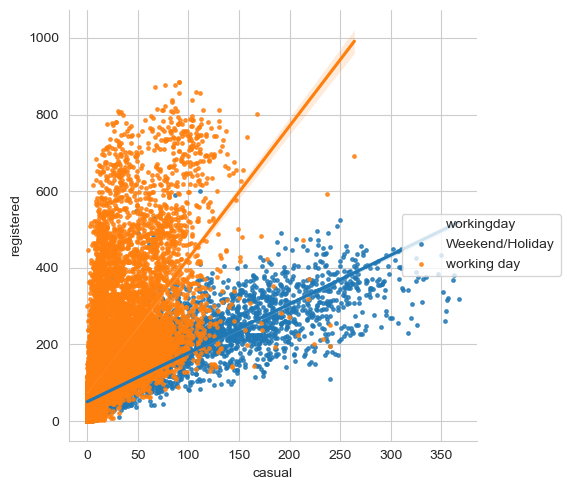

In [109]:
ax = sns.lmplot(x='casual', y='registered', hue='workingday', scatter_kws={'s': 6}, data=bike_trips, legend = True)

legend = ax.legend
legend.loc = 'upper right'
legend.set_frame_on(True)
legend.texts[0].set_text("Weekend/Holiday")
legend.texts[1].set_text("working day")

## Want to learn more?

We recommend checking out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

Here's a great blog post about the differences between Python's visualization libraries:
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/


# Part 2: Self-directed EDA of social media and internet attitudes

The last part is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  The goal here is for you to thoroughly explore a dataset on attitudes towards the internet and whether it's good for society. This section looks at a given visualization and reverse engineer the code that created it.

<img src="q2-1.png">

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Reverse Engineer

Load the data from `January 8-February 7, 2019 - Core Trends Survey - CSV.csv`, and understand what is stored in it. Read the  the survey questionnaire in `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx` to understand the meaning of each feature. Replicate the bar plot visualization shown above. Notice the labels on x and y axes as well as the legend of the plot to determine the information needed to construct the plot.

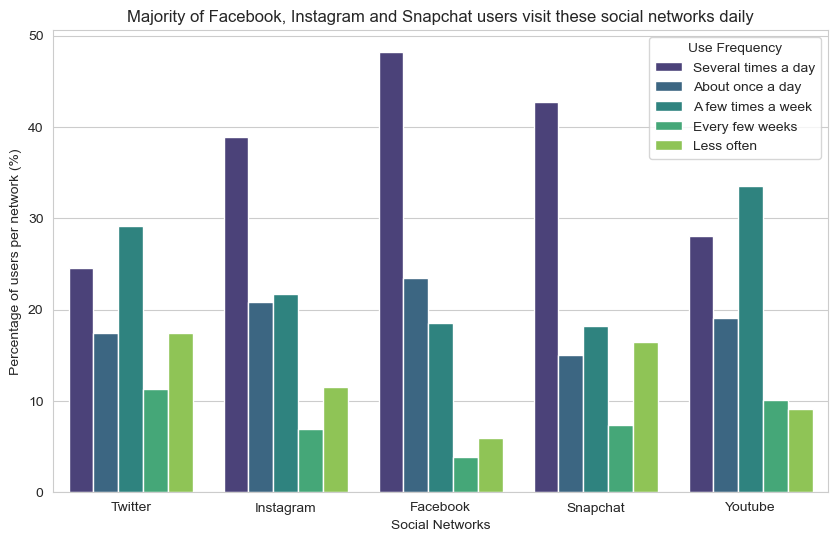

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#HINTS

# 1) Read your dataframe with pandas
df = pd.read_csv("January 8-February 7, 2019 - Core Trends Survey - CSV.csv")

# 2) Identify what colums are used for plot above: columns -> 'sns2a' - 'sns2e'

# 3) Filter required rows and columns necessary for plotting above figure
df = df.loc[:, ['sns2a', 'sns2b', 'sns2c', 'sns2d', 'sns2e']]

# 4) Your dataframe is in wide_format. You need to convert to long_format. See pandas.melt documentation
# i.e. originally there is a column each for these five social medias. The column name should be value for a new column.
df = pd.melt(df, value_vars=['sns2a', 'sns2b', 'sns2c', 'sns2d', 'sns2e'], var_name='social_media', value_name='response')

# 5) Once dataframe is in wide format, filter individuals who responded to the survey
df['response'] = pd.to_numeric(df['response'], errors='coerce')
df = df.dropna(subset=['response'])
df = df[(df['response'] > 0) & (df['response'] < 6)]
df['response'] = df['response'].astype(int)

# 6) Use pandas aggregation after groupby to calculate percentage of responses for each social media
grouped = df.groupby(['social_media', 'response']).size().reset_index(name='counts')
totals = grouped.groupby('social_media')['counts'].sum()
grouped['percentage'] = grouped.apply(lambda row: row['counts'] / totals[row['social_media']] * 100, axis=1)

grouped['social_media'] = grouped['social_media'].replace({
    'sns2a': 'Twitter',
    'sns2b': 'Instagram',
    'sns2c': 'Facebook',
    'sns2d': 'Snapchat',
    'sns2e': 'Youtube'
})
grouped['response'] = grouped['response'].replace({
    1: 'Several times a day',
    2: 'About once a day',
    3: 'A few times a week',
    4: 'Every few weeks',
    5: 'Less often'
})

# 7) Use seaborn barplot to plot the figure above. Customize with color palette='viridis'
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='social_media', y='percentage', hue='response', data=grouped, palette='viridis')

# 8) Add descriptive xlabel, ylabel, and title
plt.xlabel('Social Networks')
plt.ylabel('Percentage of users per network (%)')
plt.title('Majority of Facebook, Instagram and Snapchat users visit these social networks daily')

# 9) Customize legend if necessary
plt.legend(title='Use Frequency', loc='upper right')



<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Initial exploration

Run descriptive statistics on the data by considering the EDA key data properties we covered in class. Write a 100-150 word description of your findings. Based on these statistics or other ideas you have, form hypotheses that guide your EDA and visualizations for the last three questions. You need to show at least one visualization but you are welcome to show more.

In [69]:
import pandas as pd
import statistics

df2_1 = pd.read_csv("January 8-February 7, 2019 - Core Trends Survey - CSV.csv")
df2_1['books1'] = pd.to_numeric(df2_1['books1'], errors='coerce')
df2_1 = df2_1.dropna(subset=['books1'])
books1_mean = df2_1['books1'].mean()
print("Average number of books read: ", books1_mean)

print()
print("Summary Stats:")
df2 = pd.read_csv("January 8-February 7, 2019 - Core Trends Survey - CSV.csv")
df2 = df2.loc[:, ['books2a', 'books2b', 'books2c']]

df2 = pd.melt(df2, value_vars=['books2a', 'books2b', 'books2c'], var_name='book_type', value_name='num')
df2['book_type'] = df2['book_type'].replace({
    'books2a': 'Printed books',
    'books2b': 'Audiobooks',
    'books2c': 'E-books'
})

df2['num'] = pd.to_numeric(df2['num'], errors='coerce')
df2 = df2.dropna(subset=['num'])
df2 = df2[(df2['num'] > 0)]
df2['num'] = df2['num'].astype(int)

summary_stats = df2.groupby('book_type')['num'].agg(['mean', 'median', lambda x: statistics.mode(x), 'std', 'min', 'max']).rename(columns={'<lambda_0>': 'mode'})

print(summary_stats)

Average number of books read:  14.518641810918774

Summary Stats:
                   mean  median  mode       std  min  max
book_type                                                
Audiobooks     1.736888     2.0     2  0.517247    1    8
E-books        1.645105     2.0     2  0.550123    1    8
Printed books  1.124126     1.0     1  0.468028    1    8


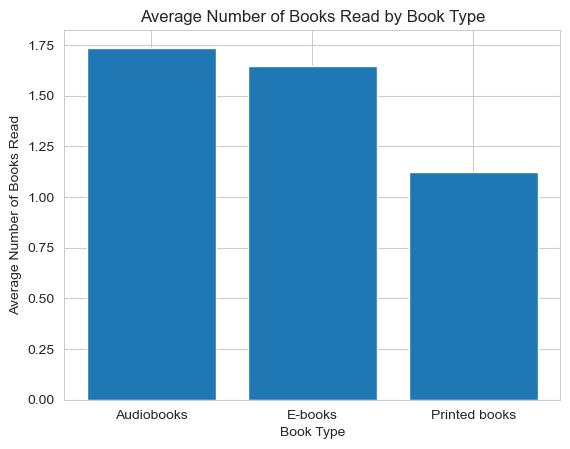

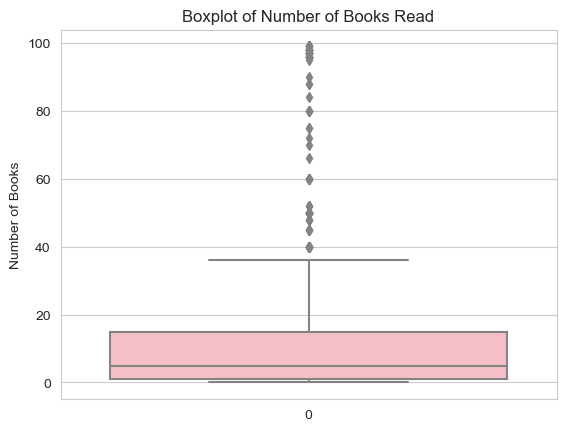

In [118]:
import matplotlib.pyplot as plt

book_means = df2.groupby('book_type')['num'].mean()

plt.bar(book_means.index, book_means.values)
plt.xlabel('Book Type')
plt.ylabel('Average Number of Books Read')
plt.title('Average Number of Books Read by Book Type')
plt.show()

sns.boxplot(data=df2_1['books1'], color='lightpink')
plt.title('Boxplot of Number of Books Read')
plt.ylabel('Number of Books')
plt.show()

Around 14.5 books are read per person on average. This may indicate that the majority of survey respondents are regular readers. When the data is split down by book type, audiobooks and e-books have slightly higher mean book reading rates (1.74 for audiobooks and 1.65 for e-books, respectively) than printed books, which have a lower mean book reading rate (1.12 for printed books). The average number of books read throughout the study period was 2, with half of the participants reading less than 2 books and the other half reading more than 2. The mode for e-books and audiobooks is also 2, demonstrating the popularity of these book formats over printed books. All book kinds have relatively low standard deviations for books read, which suggests that the data is not wildly scattered. Overall, the survey respondents appear to be regular readers, with audiobooks and e-books being more popular than traditional books.

Hypothesis: If a user uses Facebook more often, then they would have a lower average number of books read. If they do read, they are more likely to read E-books in comparision to other type of books.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Scatter Plot showing Facebook usage vs Average Books read

The graph shows a scatter plot and shows an inverse relationship between facebook usage and average number of books read. This proves our hypothesis as when a user uses Facebook more, they are more likely to have read fewer books on average than someone who does not use Facebook as often.

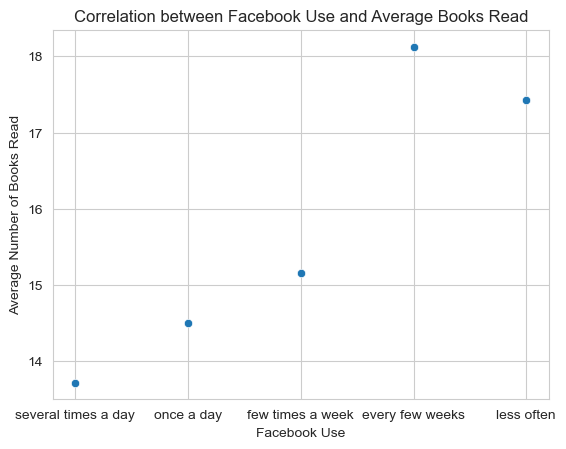

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("January 8-February 7, 2019 - Core Trends Survey - CSV.csv")
df = df[['sns2c', 'books1']]
df['books1'] = df['books1'].fillna(0)

df['books1'] = pd.to_numeric(df['books1'], errors='coerce')

df = df.dropna()

df = df[~df['sns2c'].isin([' ','8', '9'])]

grouped = df.groupby('sns2c')['books1'].mean().reset_index()
sns.scatterplot(x='sns2c', y='books1', data=grouped)

plt.xticks([0, 1, 2, 3, 4], ['several times a day', 'once a day', 'few times a week', 'every few weeks', 'less often'])
plt.xlabel('Facebook Use')
plt.ylabel('Average Number of Books Read')
plt.title('Correlation between Facebook Use and Average Books Read')

plt.show()

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Scatter Plot showing Facebook usage vs Average No. of Printed Books read

The graph shows a scatter plot and shows an random relationship between facebook usage and average number of printed books read. There are not enough data points to make a direct justification but if a single outlier is removed, then there can be a small positive correlation interpreted from the graph in which the increased usage of Facebook leads to decreased read printed books on average.

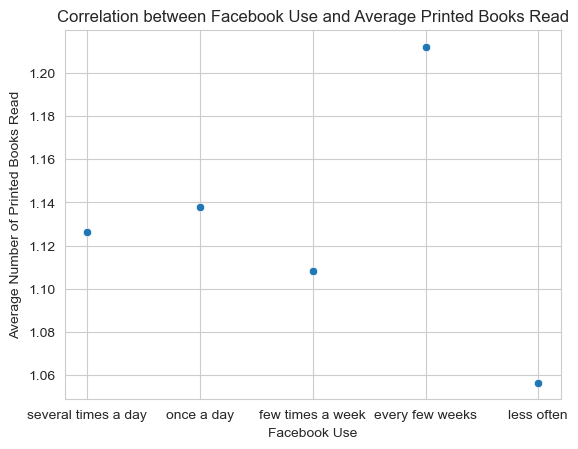

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("January 8-February 7, 2019 - Core Trends Survey - CSV.csv")
df = df[['sns2c', 'books2a']]
df['books2a'] = df['books2a'].fillna(0)

df['books2a'] = pd.to_numeric(df['books2a'], errors='coerce')

df = df.dropna()

df = df[~df['sns2c'].isin([' ','8', '9'])]

grouped = df.groupby('sns2c')['books2a'].mean().reset_index()
sns.scatterplot(x='sns2c', y='books2a', data=grouped)

plt.xticks([0, 1, 2, 3, 4], ['several times a day', 'once a day', 'few times a week', 'every few weeks', 'less often'])
plt.xlabel('Facebook Use')
plt.ylabel('Average Number of Printed Books Read')
plt.title('Correlation between Facebook Use and Average Printed Books Read')

plt.show()



<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Scatter Plot showing Facebook usage vs Average No. of E-Books read

The scatterplot shows that there is an inverse relationship in which people that spend more time on Facebook will read fewer E-Books on average than a person that uses it less. This is true for most of the plot given that the first data point can be treated as an outlier. This disproves our hypothesis in which we initially assumed there would be a positive correlation between higher usage of facebook and average number of e-books read.

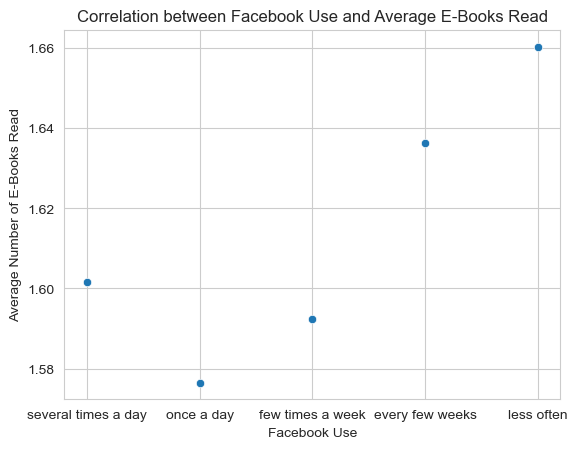

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("January 8-February 7, 2019 - Core Trends Survey - CSV.csv")
df = df[['sns2c', 'books2c']]
df['books2c'] = df['books2c'].fillna(0)

df['books2c'] = pd.to_numeric(df['books2c'], errors='coerce')

df = df.dropna()

df = df[~df['sns2c'].isin([' ','8', '9'])]

grouped = df.groupby('sns2c')['books2c'].mean().reset_index()
sns.scatterplot(x='sns2c', y='books2c', data=grouped)

plt.xticks([0, 1, 2, 3, 4], ['several times a day', 'once a day', 'few times a week', 'every few weeks', 'less often'])
plt.xlabel('Facebook Use')
plt.ylabel('Average Number of E-Books Read')
plt.title('Correlation between Facebook Use and Average E-Books Read')

plt.show()